# Pipeline for Random Forest 
#### (Supervised Learning Method)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from random_forest import random_forest_pipeline

In [43]:
import importlib
import random_forest  # your module
importlib.reload(random_forest)
from random_forest import random_forest_pipeline

In [2]:
random_seed = 54

## Data Preprocessing

In [3]:
X_mca = pd.read_csv("../data/mca_components.csv")
X_orig = pd.read_csv("../data/final_df.csv")
X_smote = pd.read_csv("../data/df_smote_with_target.csv").iloc[:, :-1]
target_smote = pd.read_csv("../data/df_smote_with_target.csv")["POLICY3_target"]
X_smote_mca_75 = pd.read_csv("../data/mca_components_smote_75.csv").iloc[:, :-1]
X_smote_mca_95 = pd.read_csv("../data/mca_components_smote_95.csv").iloc[:, :-1]

ground_truth = pd.read_csv("../data/Rawdata.csv", encoding='cp1252')["POLICY3"]

somewhat_worried = """Coronavirus is a serious illness and we should continue social distancing measures until we can safely relax them, but try to re-open as much as possible as soon as it is reasonable safe."""
very_worried = """The disease is a large threat to the health of the nation that will force unconscionable choices if we do not all act together to socially distance for as long as needed even if that means great personal sacrifice."""
not_worried = """This is all an overreaction. The disease is not that serious. We should relax social distancing measure right away."""
					
y = []
for truth in ground_truth:
    if truth == somewhat_worried:
        y.append("Somewhat Worried")
    elif truth == very_worried:
        y.append("Very Worried")
    else:
        y.append("Not Worried")

y_smote = []
for truth in target_smote:
    if truth == somewhat_worried:
        y_smote.append("Somewhat Worried")
    elif truth == very_worried:
        y_smote.append("Very Worried")
    else:
        y_smote.append("Not Worried")

# For grid search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 40],
    'min_samples_split': [2, 5, 10]
}

## Original Data

Best Paramaters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.5802469135802469
Percentage of predictions >50%: 0.7283950617283951
                  precision    recall  f1-score   support

     Not Worried       0.75      0.17      0.27        54
Somewhat Worried       0.59      0.90      0.71       137
    Very Worried       0.41      0.17      0.24        52

        accuracy                           0.58       243
       macro avg       0.58      0.41      0.41       243
    weighted avg       0.59      0.58      0.51       243

Model trained on classes: ['Not Worried' 'Somewhat Worried' 'Very Worried']
Not Worried AUC: 0.73
Somewhat Worried AUC: 0.62
Very Worried AUC: 0.70
Micro-average AUC: 0.77
ROC AUC (macro): 0.6825162620014513


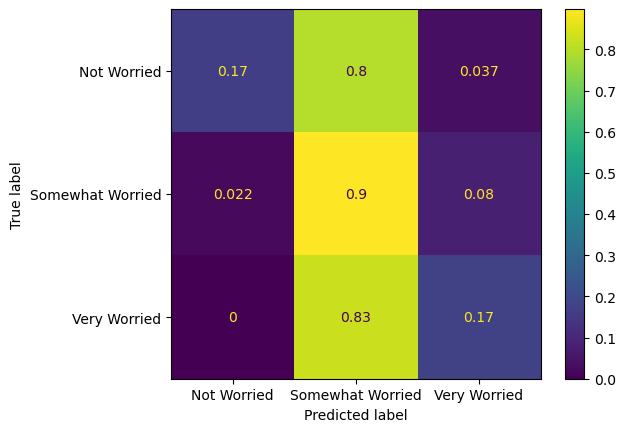

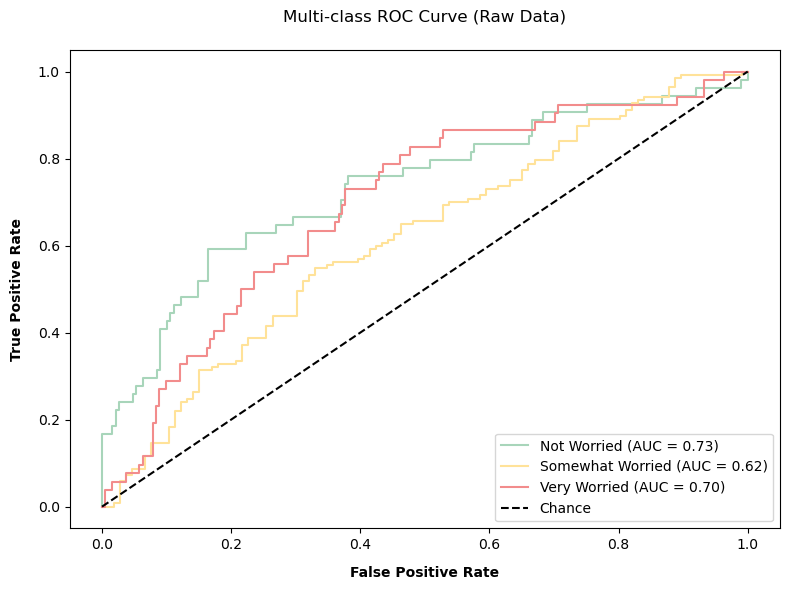

In [44]:
__ = random_forest_pipeline(X_orig, y, random_seed, param_grid)

## MCA (Processed Data)

Best Paramaters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy: 0.6090534979423868
Percentage of predictions >50%: 0.6995884773662552
                  precision    recall  f1-score   support

     Not Worried       0.54      0.24      0.33        54
Somewhat Worried       0.63      0.87      0.73       137
    Very Worried       0.52      0.31      0.39        52

        accuracy                           0.61       243
       macro avg       0.56      0.47      0.48       243
    weighted avg       0.59      0.61      0.57       243

Model trained on classes: ['Not Worried' 'Somewhat Worried' 'Very Worried']
Not Worried AUC: 0.62
Somewhat Worried AUC: 0.62
Very Worried AUC: 0.74
Micro-average AUC: 0.75
ROC AUC (macro): 0.658485934968795


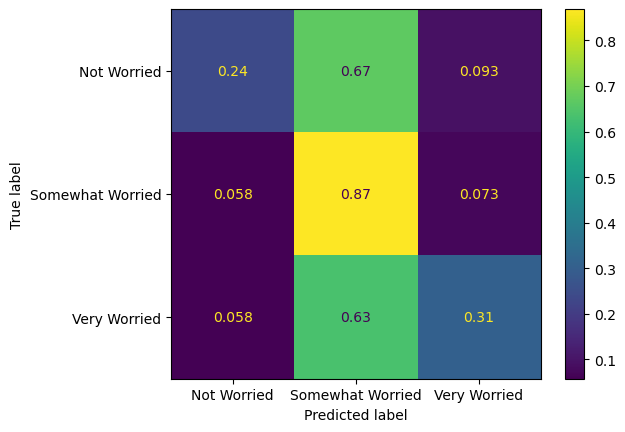

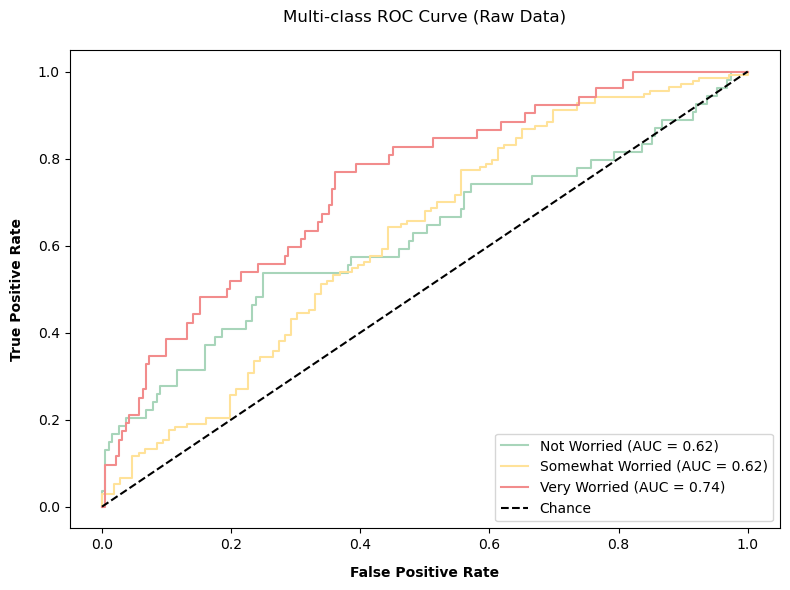

In [45]:
__ = random_forest_pipeline(X_mca, y, random_seed, param_grid)

## SMOTE (Processed Data)

Best Paramaters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.7282051282051282
Percentage of predictions >50%: 0.7230769230769231
                  precision    recall  f1-score   support

     Not Worried       0.84      0.76      0.80       135
Somewhat Worried       0.72      0.64      0.67       135
    Very Worried       0.65      0.79      0.71       120

        accuracy                           0.73       390
       macro avg       0.73      0.73      0.73       390
    weighted avg       0.74      0.73      0.73       390

Model trained on classes: ['Not Worried' 'Somewhat Worried' 'Very Worried']
Not Worried AUC: 0.93
Somewhat Worried AUC: 0.88
Very Worried AUC: 0.88
Micro-average AUC: 0.90
ROC AUC (macro): 0.8961943234083757


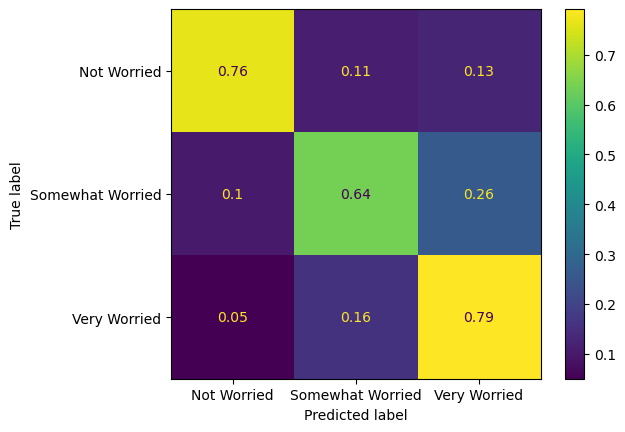

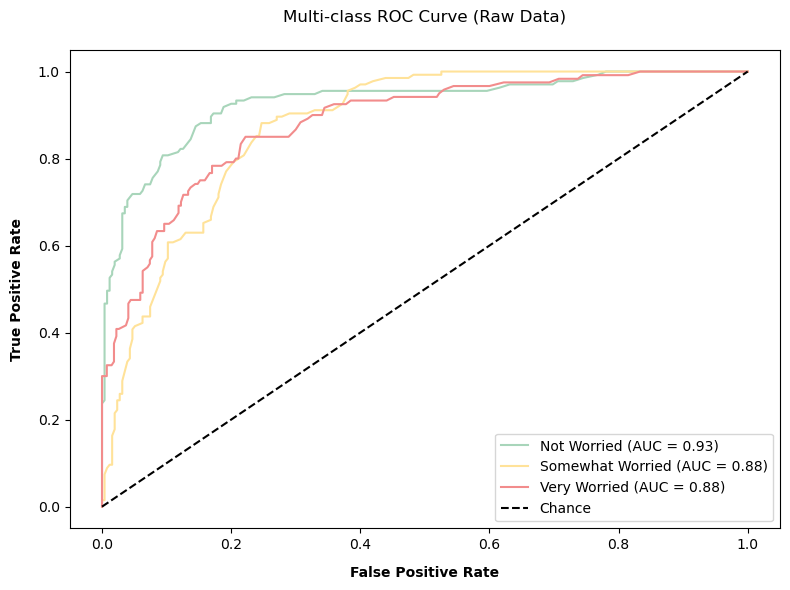

In [46]:
y_test_smote, y_pred_smote, X_test_smote, pred_prob = random_forest_pipeline(X_smote, y_smote, random_seed, param_grid)

In [21]:
# convert y_test_smote and y_pred_smote to NumPy arrays
y_test_smote = np.array(y_test_smote)
y_pred_smote = np.array(y_pred_smote)

# take some correctly predicted samples for visualization
correct_indices = np.where(y_pred_smote == y_test_smote)[0]
sample_indices = correct_indices[:20]
samples = X_test_smote.iloc[sample_indices]

# extract information
true_labels = y_test_smote[sample_indices]
predicted_labels = y_pred_smote[sample_indices]
prediction_probs = pred_prob[sample_indices]

# LINE VERSION

# attach original feature names
feature_columns = X_test_smote.columns
sample_features_df = pd.DataFrame(samples.values, columns=feature_columns)

# build summary
results_df = pd.DataFrame({
    "True Label": true_labels,
    "Predicted Label": predicted_labels,
    "Probabilities": [list(p) for p in prediction_probs],
    "Features": sample_features_df.to_dict(orient="records")
})


# print result
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
print(results_df)

# TABLE VERSION

# create data frame for samples
results_df = samples.copy()

# add the label and probability columns
results_df.insert(0, "Probabilities (Not, Somewhat, Very)", prediction_probs.tolist())
results_df.insert(0, "Predicted Label", predicted_labels)
results_df.insert(0, "True Label", true_labels)

# display
from IPython.display import display
display(results_df)

          True Label   Predicted Label         Probabilities  \
0        Not Worried       Not Worried    [0.83, 0.13, 0.04]   
1        Not Worried       Not Worried    [0.87, 0.06, 0.07]   
2   Somewhat Worried  Somewhat Worried  [0.245, 0.535, 0.22]   
3   Somewhat Worried  Somewhat Worried  [0.21, 0.455, 0.335]   
4        Not Worried       Not Worried   [0.5, 0.155, 0.345]   
5        Not Worried       Not Worried  [0.545, 0.22, 0.235]   
6        Not Worried       Not Worried  [0.51, 0.395, 0.095]   
7        Not Worried       Not Worried   [0.775, 0.025, 0.2]   
8       Very Worried      Very Worried  [0.105, 0.29, 0.605]   
9       Very Worried      Very Worried    [0.24, 0.08, 0.68]   
10      Very Worried      Very Worried     [0.07, 0.43, 0.5]   
11       Not Worried       Not Worried  [0.505, 0.365, 0.13]   
12  Somewhat Worried  Somewhat Worried  [0.185, 0.53, 0.285]   
13      Very Worried      Very Worried  [0.045, 0.025, 0.93]   
14      Very Worried      Very Worried  

,True Label,Predicted Label,"Probabilities (Not, Somewhat, Very)",HR5_No opinion,HR5_Somewhat dissatisfied,HR5_Somewhat satisfied,HR5_Very dissatisfied,HR5_Very satisfied,HR6_Excellent,HR6_Fair,HR6_Good,HR6_No opinion,HR6_Poor,HR13_No,HR13_Unsure,"HR13_Yes, I lost my health insurance due to losing my job","HR13_Yes, I lost my health insurance for other reasons","HR13_Yes, somebody close to me lost their health insurance due to losing their job","HR13_Yes, somebody close to me lost their health insurance for other reasons","HR14_Medicaid, a program that provides health insurance to certain low-income families",HR14_Medicare plus a supplemental plan/Medicare Advantage,"HR14_Medicare, the program that provides insurance to people 65 and older","HR14_None, uninsured","HR14_Other, specify",HR14_Private health insurance plan sponsored through an employer (your own or your spouse's or parent's plan),HR14_Private health insurance plan that you (or your spouse/parents) purchase on the individual marketplace with a subsidy from the government,HR14_Private health insurance plan that you (or your spouse/parents) purchase on the individual marketplace with no subsidy,HR14_Veteran's Affairs or Tricare,STIMULUS2_No,"STIMULUS2_Yes, somebody close to me","STIMULUS2_Yes, someone in my immediate family",POLICY1_A little ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿,POLICY1_A lot- lost significant income as a consequence,POLICY1_Not at all- has not affected my finances personally,POLICY2_Not at all concerned,POLICY2_Somewhat concerned,POLICY2_Very concerned,STIMULUS1_Work from home,STIMULUS1_Lost job,STIMULUS1_Furloughed,STIMULUS1_Reduced hours,STIMULUS1_Pay cut,STIMULUS1_Work more hours,"STIMULUS1_Increased pay (i.e., from working overtime/hazard pay)","STIMULUS1_Nothing changed (i.e., was retired; already worked from home, etc)","STIMULUS5_Yes, check from the government","STIMULUS5_Yes, small business loan","STIMULUS5_Yes, unemployment benefits",STIMULUS5_No,STIMULUS5_Unsure,"STIMULUS5_Other, specify",DEMOGRAPHIC3_adult,DEMOGRAPHIC3_child,DEMOGRAPHIC3_middle_age,DEMOGRAPHIC3_senior,DEMOGRAPHIC3_teenager,DEMOGRAPHIC3_young_adult,DEMOGRAPHIC13_Lower class/poor,DEMOGRAPHIC13_Lower middle class,DEMOGRAPHIC13_Middle class,DEMOGRAPHIC13_Upper class/wealthy,DEMOGRAPHIC13_Upper middle class,"DEMOGRAPHIC11_$10,001-$20,000","DEMOGRAPHIC11_$150,001-$200,000","DEMOGRAPHIC11_$20,001-$50,000","DEMOGRAPHIC11_$250,001+","DEMOGRAPHIC11_$50,001-$75,000","DEMOGRAPHIC11_$75,001-$150,000","DEMOGRAPHIC11_< $10,000","DEMOGRAPHIC11_>$201,000-250,000",DEMOGRAPHIC7_No,DEMOGRAPHIC7_Yes,ELDERLYCARE1_No,ELDERLYCARE1_Yes,CHILDCARE3_No,CHILDCARE3_Yes,CHILDCARE1_No,CHILDCARE1_Yes,MEDIA17_No,MEDIA17_Yes,"MEDIA16_Yes, from a soup kitchen","MEDIA16_Yes, from a school district","MEDIA16_Yes, from a food bank","MEDIA16_Yes, from the food stamps program/EBT","MEDIA16_Yes, from a community food distribution program","MEDIA16_No, have not sought food assistance",MEDIA16_Don't know
1909,Not Worried,Not Worried,"[0.83, 0.13, 0.04]",0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0
1918,Not Worried,Not Worried,"[0.87, 0.06, 0.07]",0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0
590,Somewhat Worried,Somewhat Worried,"[0.245, 0.535, 0.22]",0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0
1122,Somewhat Worried,Somewhat Worried,"[0.21, 0.455, 0.335]",0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0
1798,Not Worried,Not Worried,"[0.5, 0.155, 0.345]",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,

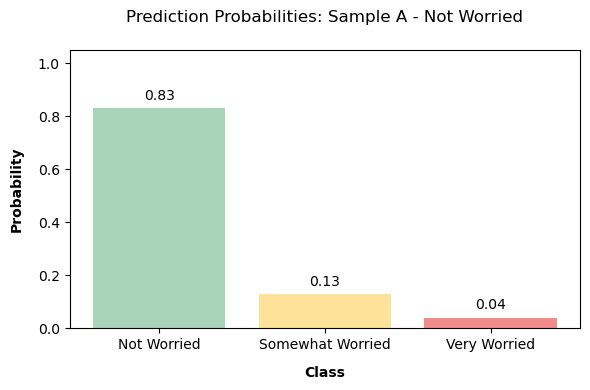

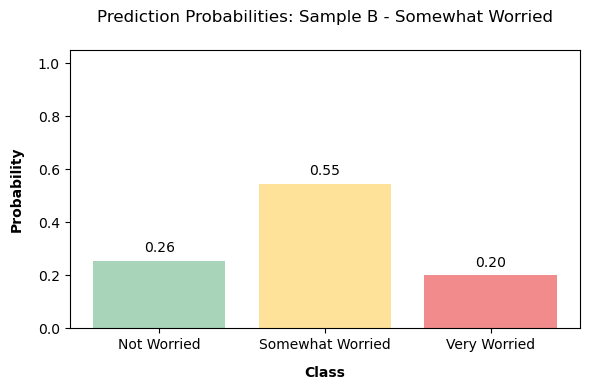

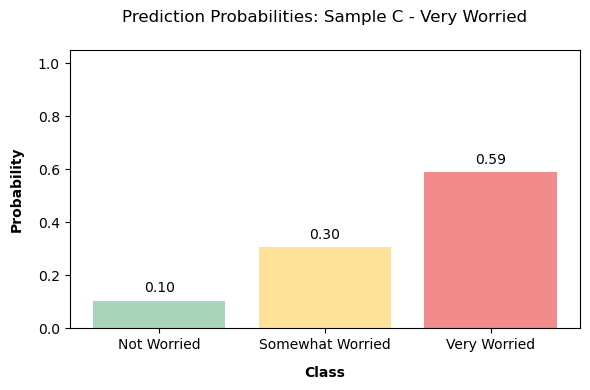

In [22]:
# define colors and labels
colors = ['#A8D5BA', '#FFE299', '#F28C8C']
labels = ['Not Worried', 'Somewhat Worried', 'Very Worried']

# create function to make bar charts. probs = [N, S, V]. sample_label = "title." save_as = "title" or None.
def plot_pred_bar(probs, sample_label, save_as=None):
    plt.figure(figsize=(6, 4))
    bars = plt.bar(labels, probs, color=colors)

    # Annotate bars with probabilities
    for bar, prob in zip(bars, probs):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                 f'{prob:.2f}', ha='center', va='bottom', fontsize=10)

    plt.ylim(0, 1.05)
    plt.title(f'Prediction Probabilities: {sample_label}', pad=20)
    plt.ylabel('Probability', fontweight='bold', labelpad=10)
    plt.xlabel('Class', fontweight='bold', labelpad=10)
    plt.tight_layout()

    if save_as:
        plt.savefig(save_as, dpi=300)
    plt.show()

# sample 0: Not Worried
plot_pred_bar([0.83, 0.13, 0.04], 'Sample A - Not Worried')

# sample 2: Somewhat Worried
plot_pred_bar([0.255, 0.545, 0.2], 'Sample B - Somewhat Worried')

# sample 8: Very Worried
plot_pred_bar([0.105, 0.305, 0.59], 'Sample C - Very Worried')

## SMOTE + MCA - 0.75 Variance (Processed Data)

Best Paramaters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6128205128205129
Percentage of predictions >50%: 0.6487179487179487
                  precision    recall  f1-score   support

     Not Worried       0.73      0.58      0.64       135
Somewhat Worried       0.58      0.54      0.56       135
    Very Worried       0.56      0.73      0.63       120

        accuracy                           0.61       390
       macro avg       0.62      0.62      0.61       390
    weighted avg       0.63      0.61      0.61       390

Model trained on classes: ['Not Worried' 'Somewhat Worried' 'Very Worried']
Not Worried AUC: 0.82
Somewhat Worried AUC: 0.76
Very Worried AUC: 0.82
Micro-average AUC: 0.80
ROC AUC (macro): 0.7977217985959816


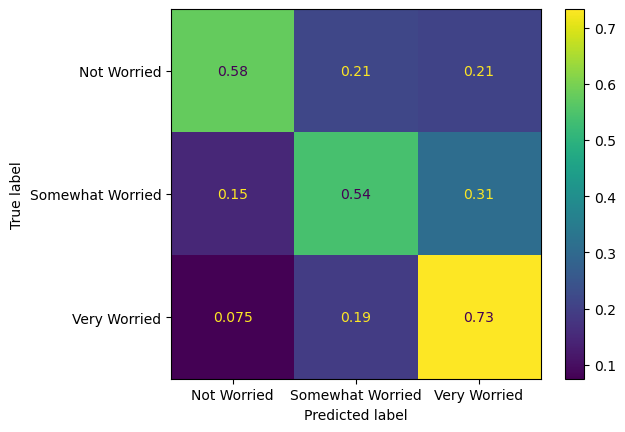

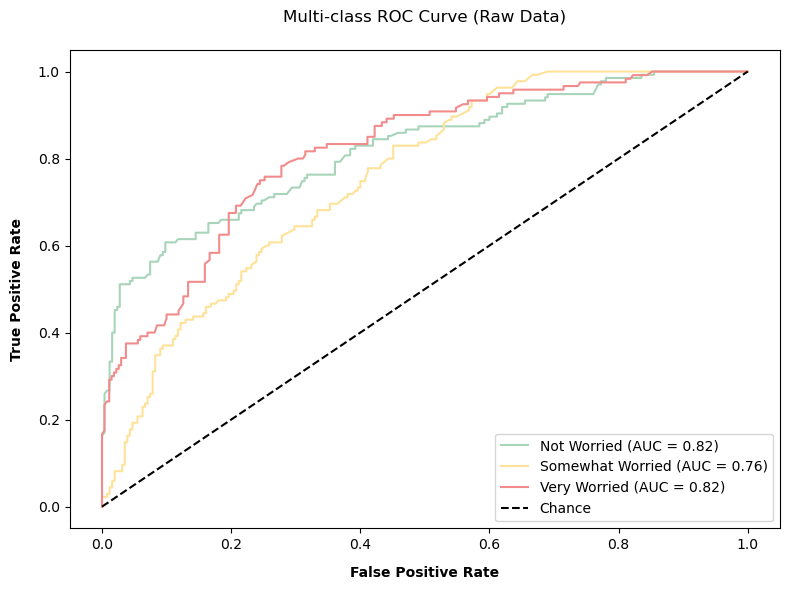

In [47]:
__ = random_forest_pipeline(X_smote_mca_75, y_smote, random_seed, param_grid)

## SMOTE + MCA - 0.95 Variance (Processed Data)

Best Paramaters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.6794871794871795
Percentage of predictions >50%: 0.4897435897435897
                  precision    recall  f1-score   support

     Not Worried       0.84      0.65      0.73       135
Somewhat Worried       0.63      0.70      0.66       135
    Very Worried       0.61      0.69      0.65       120

        accuracy                           0.68       390
       macro avg       0.69      0.68      0.68       390
    weighted avg       0.70      0.68      0.68       390

Model trained on classes: ['Not Worried' 'Somewhat Worried' 'Very Worried']
Not Worried AUC: 0.87
Somewhat Worried AUC: 0.83
Very Worried AUC: 0.86
Micro-average AUC: 0.85
ROC AUC (macro): 0.8536601307189541


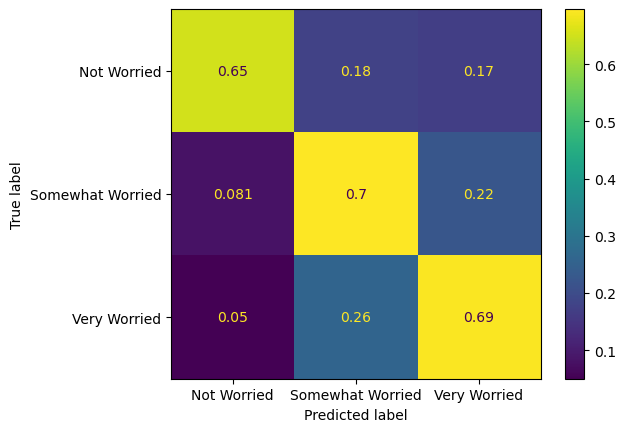

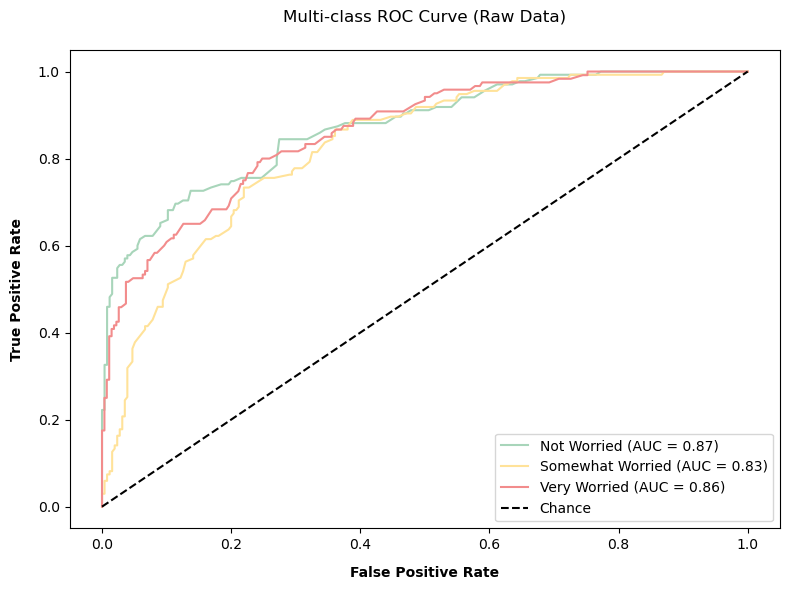

In [48]:
__ = random_forest_pipeline(X_smote_mca_95, y_smote, random_seed, param_grid)

## XG Boost Trial

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

xgb_model = GradientBoostingClassifier(random_state=random_seed)

# grid search
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)
xgb_model = grid_search.best_estimator_

theta = xgb_model.fit(X_train_smote, y_train_smote)
y_pred_smote = xgb_model.predict(X_test_smote)

accuracy = accuracy_score(y_test_smote, y_pred_smote)
print(f"Accuracy: {accuracy}")

not_random = 0
pred_prob = xgb_model.predict_proba(X_test_smote)
for item in pred_prob:
   if any(num > 0.5 for num in item):
				not_random+=1
print(f"Percentage of predictions >50%: {not_random/len(X_test_smote)}")


Accuracy: 0.735897435897436
Percentage of predictions >50%: 0.9794871794871794


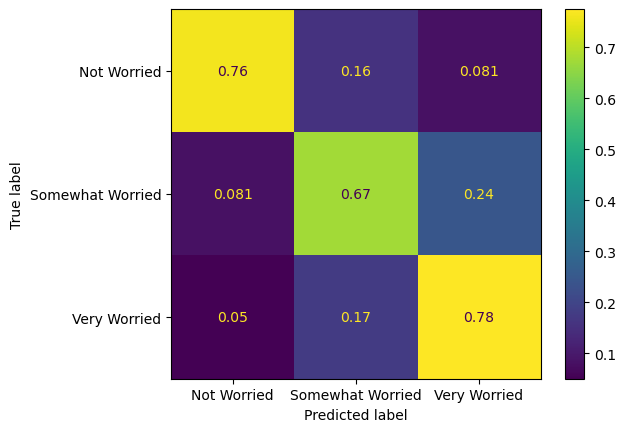

In [64]:
_  = ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_smote, y_test_smote, normalize="true")